# Градиентный спуск

## 1) <font color='blue' size=5> Градиентный спуск на двумерной плоскости

Минимум достигается при x = 4.9997
Значение функции в точке минимума = 0.0000


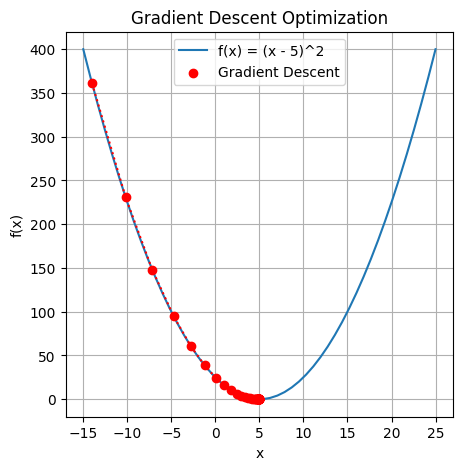

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию и ее производную
def func(x):
    return (x - 5)**2

def grad(x):
    return 2 * (x - 5)

# Параметры градиентного спуска
learning_rate = 0.1
num_iterations = 50
x_initial = -14  # Начальное значение

# Градиентный спуск
x_values = [x_initial]
for i in range(num_iterations):
    x_new = x_values[-1] - learning_rate * grad(x_values[-1])
    x_values.append(x_new)


print(f"Минимум достигается при x = {x_values[-1]:.4f}")
print(f"Значение функции в точке минимума = {func(x_values[-1]):.4f}")


x = np.linspace(-15, 25)
y = func(x)

plt.figure(figsize=(5, 5))
plt.plot(x, y, label='f(x) = (x - 5)^2')
plt.scatter(x_values, [func(x) for x in x_values], color='red', label='Gradient Descent', zorder=5)
plt.plot(x_values, [func(x) for x in x_values], color='red', linestyle='dotted', zorder=5)
plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import plotly.graph_objects as go

# Функция и её производная
def f(x):
    return (x-5)**2

def df(x):
    return 2*(x-5)

# Градиентный спуск
def gradient_descent(starting_x, learning_rate, num_iterations):
    x = starting_x
    x_history = [x]
    y_history = [f(x)]
    grad_history = [df(x)]

    for _ in range(num_iterations):
        grad = df(x)
        x = x - learning_rate * grad
        x_history.append(x)
        y_history.append(f(x))
        grad_history.append(grad)

    return x_history, y_history, grad_history

# Начальные параметры
starting_x = -9
learning_rate = 0.7
num_iterations = 70

x_history, y_history, grad_history = gradient_descent(starting_x, learning_rate, num_iterations)

# Создание графика
x_range = np.linspace(-20, 20)
y_range = f(x_range)

fig = go.Figure()

# Добавляем основной график функции
fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines', name='Function'))

# Добавляем точку
fig.add_trace(go.Scatter(x=[x_history[0]], y=[y_history[0]], mode='markers', marker=dict(color='red', size=10), name='Point'))

# Добавляем интерактивный слайдер
steps = []
for i in range(len(x_history)):
    prev_y = y_history[i-1] if i > 0 else 'N/A'
    annotation_text = f"x={x_history[i]:.2f}, y={y_history[i]:.2f}, grad={grad_history[i]:.2f}, prev_y={prev_y:.2f}" if i > 0 else f"x={x_history[i]:.2f}, y={y_history[i]:.2f}, grad={grad_history[i]:.2f}"
    step = dict(
        method="update",
        args=[{"x": [x_range, [x_history[i]]],
               "y": [y_range, [y_history[i]]]},
              {"title": f"Step: {i}",
               "annotations": [{
                   "x": x_history[i],
                   "y": y_history[i],
                   "xref": "x",
                   "yref": "y",
                   "text": annotation_text,
                   "showarrow": True,
                   "arrowhead": 7,
                   "ax": 0,
                   "ay": -80}]
              }],
        label=str(i)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Step: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Interactive Gradient Descent with Slider",
    xaxis=dict(range=[-20, 25], autorange=False),
    yaxis=dict(range=[-10, 210], autorange=False),
    showlegend=True
)

# Сохраняем график в HTML
# fig.write_html("gradient_descent_interactive.html")

fig.show()

## 2) <font color='blue' size=5> Градиентный спуск на трёхмерной плоскости

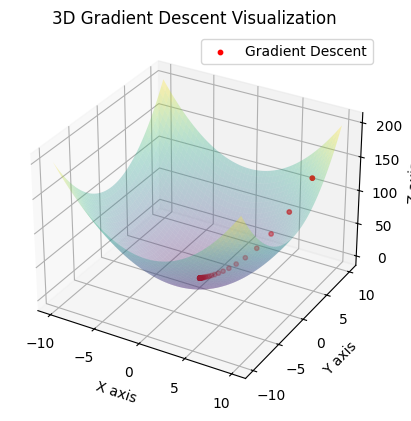

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция и её градиент
def f(x, y):
    return x**2 + y**2

def df(x, y):
    return 2 * x, 2 * y

# Градиентный спуск
def gradient_descent_3d(starting_x, starting_y, learning_rate, num_iterations):
    x, y = starting_x, starting_y
    x_history, y_history, z_history = [x], [y], [f(x, y)]
    for _ in range(num_iterations):
        grad_x, grad_y = df(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        x_history.append(x)
        y_history.append(y)
        z_history.append(f(x, y))
    return x_history, y_history, z_history

# Начальные параметры
starting_x = 8
starting_y = 8
learning_rate = 0.1
num_iterations = 50

x_history, y_history, z_history = gradient_descent_3d(starting_x, starting_y, learning_rate, num_iterations)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)

# Добавление точек градиентного спуска
ax.scatter(x_history, y_history, z_history, color='r', s=10, label='Gradient Descent')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Gradient Descent Visualization')
ax.legend()

plt.show()


# GD и SGD для линейной регрессии

## градиентный спуск

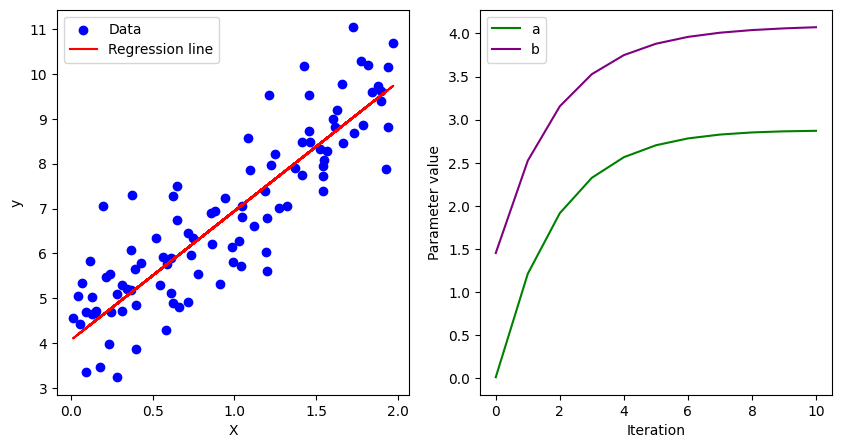

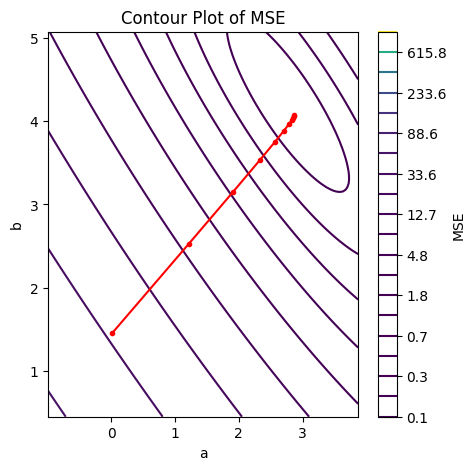

In [2]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Начальные значения параметров
a_n = np.random.randn(1)
b_n = np.random.randn(1)
learning_rate = 0.1
n_iterations = 10
m = len(X)

# Хранение значений параметров для визуализации
a_history = [a_n]
b_history = [b_n]

# Градиентный спуск
for iteration in range(n_iterations):
    y_pred = a_n * X + b_n
    error = y_pred - y
    a_gradient = 2/m * np.sum(X * error)
    b_gradient = 2/m * np.sum(error)
    a_n = a_n - learning_rate * a_gradient
    b_n = b_n - learning_rate * b_gradient
    a_history.append(a_n)
    b_history.append(b_n)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, a_n * X + b_n, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(a_history, label='a', color='green')
plt.plot(b_history, label='b', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
A, B = np.meshgrid(a_vals, b_vals)
Z = np.zeros_like(A)

for i in range(len(A)):
    for j in range(len(B)):
        y_pred = A[i, j] * X + B[i, j]
        Z[i, j] = np.mean((y - y_pred) ** 2)

plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(a_history, b_history, 'ro-', markersize=3)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Contour Plot of MSE')
plt.colorbar(label='MSE')

plt.show()

## стохастический градиентный спуск

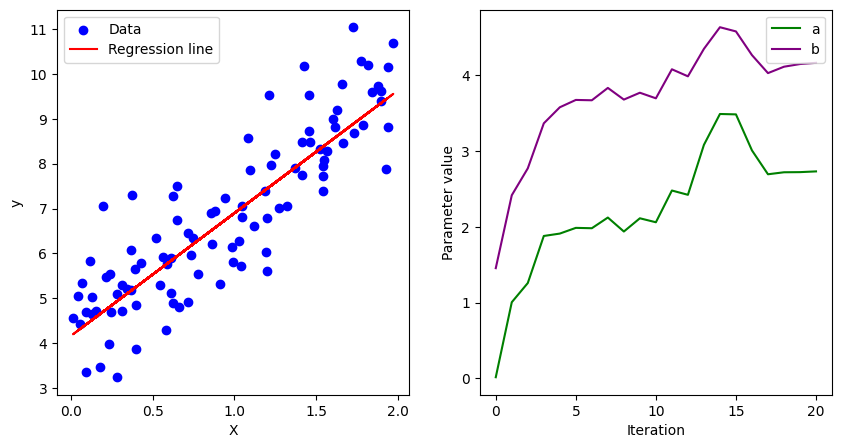

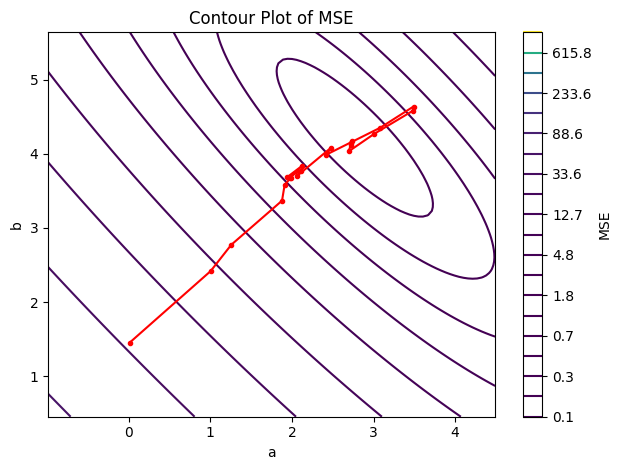

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Начальные значения параметров
a_n = np.random.randn()
b_n = np.random.randn()
learning_rate = 0.1
m = len(X)

# Хранение значений параметров для визуализации
a_history = [a_n]
b_history = [b_n]

# Стохастический градиентный спуск
for i in range(20):
    rand_index = np.random.randint(m)
    x_i = X[rand_index, 0]
    y_i = y[rand_index, 0]
    y_pred = a_n * x_i + b_n
    error = y_pred - y_i
    a_gradient = 2 * x_i * error
    b_gradient = 2 * error
    a_n = a_n - learning_rate * a_gradient
    b_n = b_n - learning_rate * b_gradient
    a_history.append(a_n)
    b_history.append(b_n)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, a_n * X + b_n, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(a_history, label='a', color='green')
plt.plot(b_history, label='b', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()
plt.show()


a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
A, B = np.meshgrid(a_vals, b_vals)
Z = np.zeros_like(A)

for i in range(len(A)):
    for j in range(len(B)):
        y_pred = A[i, j] * X + B[i, j]
        Z[i, j] = np.mean((y - y_pred) ** 2)

plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(a_history, b_history, 'ro-', markersize=3)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Contour Plot of MSE')
plt.colorbar(label='MSE')

plt.tight_layout()
plt.show()


## SGD для Huber

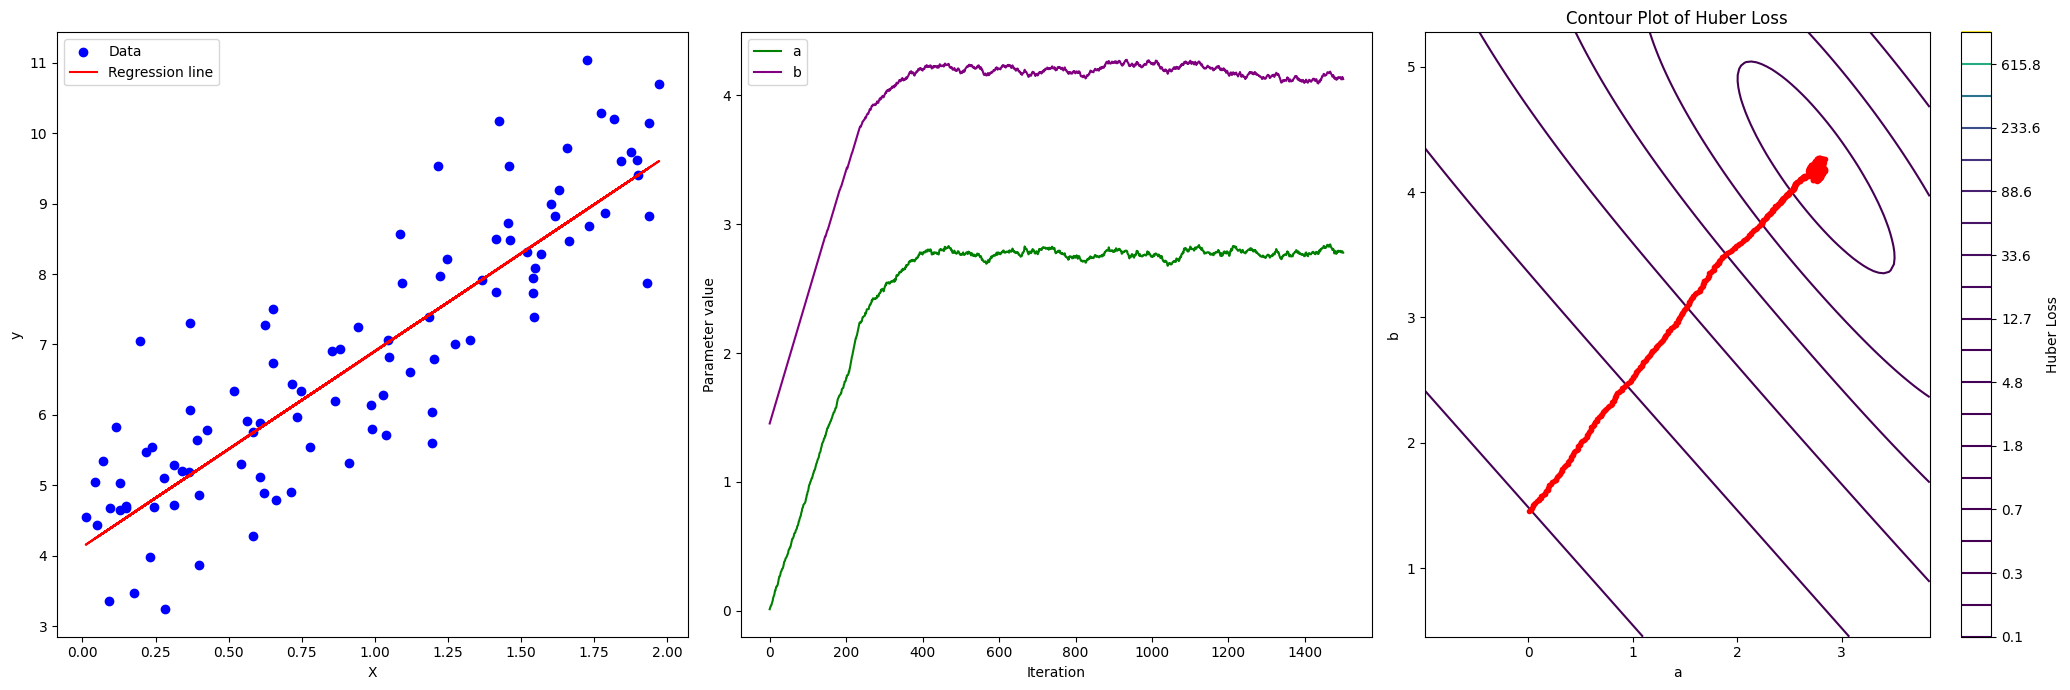

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Начальные значения параметров
a_n = np.random.randn()
b_n = np.random.randn()
learning_rate = 0.01
m = len(X)
delta = 1.0
n_iter = 1500

# Хранение значений параметров для визуализации
a_history = [a_n]
b_history = [b_n]

# Стохастический градиентный спуск с функцией потерь Хубера
for i in range(n_iter):
    rand_index = np.random.randint(m)
    x_i = X[rand_index, 0]  # Преобразование к правильной форме
    y_i = y[rand_index, 0]  # Преобразование к правильной форме
    y_pred = a_n * x_i + b_n
    error = y_i - y_pred

    if np.abs(error) <= delta:
        a_gradient = -error * x_i
        b_gradient = -error
    else:
        a_gradient = -delta * np.sign(error) * x_i
        b_gradient = -delta * np.sign(error)

    a_n = a_n - learning_rate * a_gradient
    b_n = b_n - learning_rate * b_gradient
    a_history.append(a_n)
    b_history.append(b_n)

# Визуализация процесса обучения
plt.figure(figsize=(21, 7))

# График данных и регрессии
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, a_n * X + b_n, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# График изменения параметров
plt.subplot(1, 3, 2)
plt.plot(a_history, label='a', color='green')
plt.plot(b_history, label='b', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()

# График линий уровня
plt.subplot(1, 3, 3)
a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
A, B = np.meshgrid(a_vals, b_vals)
Z = np.zeros_like(A)

for i in range(len(A)):
    for j in range(len(B)):
        y_pred = A[i, j] * X + B[i, j]
        errors = y - y_pred
        huber_loss = np.where(np.abs(errors) <= delta,
                              0.5 * errors**2,
                              delta * np.abs(errors) - 0.5 * delta**2)
        Z[i, j] = np.mean(huber_loss)

plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(a_history, b_history, 'ro-', markersize=3)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Contour Plot of Huber Loss')
plt.colorbar(label='Huber Loss')

plt.tight_layout()
plt.show()
